<a href="https://colab.research.google.com/github/Archandra12/Term4-Projects/blob/Ghouls/Ghouls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv')

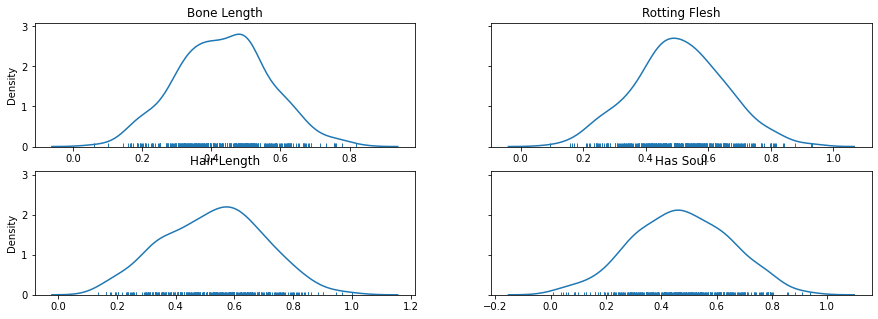

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 5), sharey=True)
import warnings
warnings.filterwarnings("ignore")
sns.distplot(ax=axes[0,0], x=df.bone_length, hist=False, rug=True)
axes[0,0].set_title('Bone Length')
sns.distplot(ax=axes[0,1], x=df.rotting_flesh, hist=False, rug=True)
axes[0,1].set_title('Rotting Flesh')
sns.distplot(ax=axes[1,0], x=df.hair_length, hist=False, rug=True)
axes[1,0].set_title('Hair Length')
sns.distplot(ax=axes[1,1], x=df.has_soul, hist=False, rug=True)
axes[1,1].set_title('Has Soul')
plt.show()

Observation: Values in columns are not distributed normaly. Bone length shows a peek towards right. Rotting Flesh shows peek towards left. Peek of Hairlength is towards right. Has soul shows normal distribution.

###Let's see if standard scalar will help us

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul' ]]
scaler.fit(data)
df_data = scaler.transform(data)


In [53]:
data_sd = pd.DataFrame(df_data, columns=['bone_length', 'rotting_flesh', 'hair_length', 'has_soul' ])
data_sd

,bone_length,rotting_flesh,hair_length,has_soul
0,-0.600418,-1.067386,-0.373386,1.761024
1,1.065931,-0.554049,0.013479,-0.179048
2,0.254162,-1.043498,1.664981,1.818350
3,2.581850,0.012822,0.634464,2.348442
4,0.994744,2.524715,-0.651376,0.938337
...,...,...,...,...
366,0.180710,-0.787414,0.774878,0.934081
367,-0.770606,0.396737,0.059534,0.455271
368,0.357922,-0.039008,-0.192536,0.412817
369,-1.049475,1.809230,0.320548,-0.970904


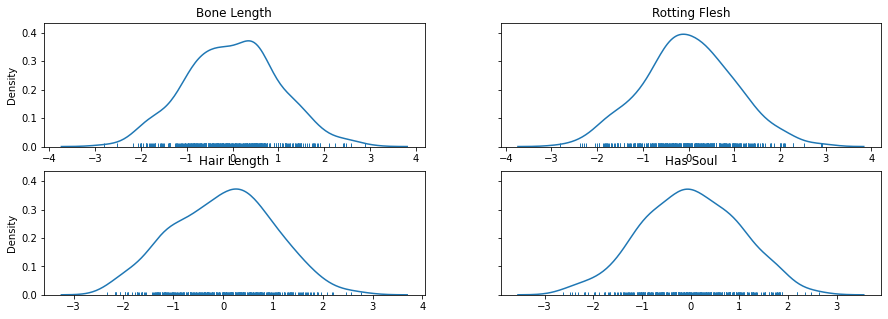

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5), sharey=True)
sns.distplot(ax=axes[0,0], x=data_sd.bone_length, hist=False, rug=True)
axes[0,0].set_title('Bone Length')
sns.distplot(ax=axes[0,1], x=data_sd.rotting_flesh, hist=False, rug=True)
axes[0,1].set_title('Rotting Flesh')
sns.distplot(ax=axes[1,0], x=data_sd.hair_length, hist=False, rug=True)
axes[1,0].set_title('Hair Length')
sns.distplot(ax=axes[1,1], x=data_sd.has_soul, hist=False, rug=True)
axes[1,1].set_title('Has Soul')
plt.show()

Looking at the graphs above we can say that our effrt of data standardaisation has not effected the data much. Therefore, we will train the model with our original data

In [58]:
df.color.unique() #Checking unique values our categrical feature color

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

In [59]:
df.type.unique() # Checking unique values our target variable has

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

Taking feature variables

In [92]:
X = df.iloc[:, df.columns!='type']
X = X.iloc[:, X.columns!='id']


In [93]:
X

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,clear
1,0.575560,0.425868,0.531401,0.439899,green
2,0.467875,0.354330,0.811616,0.791225,black
3,0.776652,0.508723,0.636766,0.884464,black
4,0.566117,0.875862,0.418594,0.636438,green
...,...,...,...,...,...
366,0.458132,0.391760,0.660590,0.635689,blue
367,0.331936,0.564836,0.539216,0.551471,green
368,0.481640,0.501147,0.496446,0.544003,clear
369,0.294943,0.771286,0.583503,0.300618,clear


Performing OneHotEncoding on DataFrame to ensure we have correct conversion of categorical feature into numerical data

In [95]:
X = pd.get_dummies(X, drop_first=True, prefix ='color', prefix_sep = '_')

In [96]:
X

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.354512,0.350839,0.465761,0.781142,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,0,0,0,0,0
3,0.776652,0.508723,0.636766,0.884464,0,0,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
366,0.458132,0.391760,0.660590,0.635689,0,1,0,0,0
367,0.331936,0.564836,0.539216,0.551471,0,0,0,1,0
368,0.481640,0.501147,0.496446,0.544003,0,0,1,0,0
369,0.294943,0.771286,0.583503,0.300618,0,0,1,0,0


In [97]:
y = df.loc[:, df.columns=='type']

In [98]:
y.type.unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

In [99]:
y = y.type.map({'Ghoul':1, 'Goblin':2, 'Ghost':3})

In [100]:
y

0      1
1      2
2      1
3      1
4      3
      ..
366    2
367    3
368    1
369    3
370    1
Name: type, Length: 371, dtype: int64

### Our Data is ready for model training.

As our problem is supervised (classification) we can apply supervised learnings and see how our model behaves for prediction.
We can try following to begin with:
 - KNN
 - SVM
 - Cosine Similarity
 - Logistic Regression
 - Random Forest Classifier
 - Decision Tree Classifier



In Order to check the Accuracy of Models we need to split our training data so that we can compare the predicted value with actual value given in the data which we consider as Validation data.

Let's split the training data into two sets (Train and Validation)

In [139]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

#KNN Classifier

In [161]:
from sklearn.neighbors import KNeighborsClassifier
#in the classifier we can supply parameters as follows
#n_neighborsint, default=5, weights{‘uniform’, ‘distance’} or callable, default=’uniform’, algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
#leaf_sizeint, default=30 :Leaf size passed to BallTree or KDTree, pint, default=2; Power parameter for the Minkowski metric When p = 1, this is equivalent to using manhattan_distance (l1),
#and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. metricstr or callable, default=’minkowski’ metric_paramsdict, default=None
#Additional keyword arguments for the metric function. n_jobsint, default=None The number of parallel jobs to run for neighbors search; -1 means all processors, None means 1

neigh = KNeighborsClassifier(n_neighbors=35)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

As we know KNN is called a Lazy learning fit action on model just stores data in model and doesn't actually perform any training.

In [162]:
neigh.score(X_train, y_train)

0.6640926640926641

Performing Validation of Model to get predicted value from Model and comparing that with actual target value available in Validation data set 

In [163]:
y_val_predict = neigh.predict(X_val)
y_val_predict_prob = neigh.predict_proba(X_val)

###Checking the accuracy of the Model

In [164]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_val_predict))

Accuracy: 0.7142857142857143


###Checking error rate to see what could be best value of K for our model 

Minimum error:- 0.2857142857142857 at K = 35


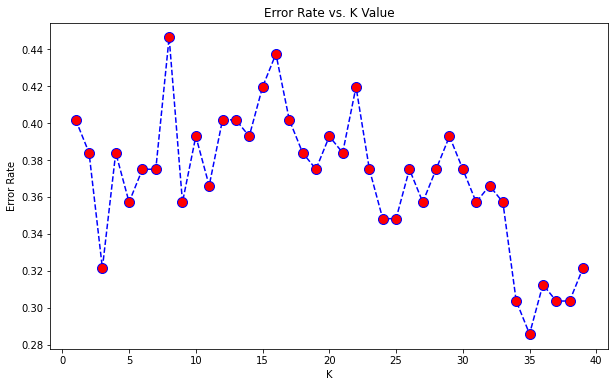

In [165]:
import numpy as np
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

From the plot, you can see that the smallest error we got is 0.2857142857142857 at K=35. <br/>
**Further on, we visualize the plot between accuracy and K value.**

Maximum accuracy:- 0.7142857142857143 at K = 35


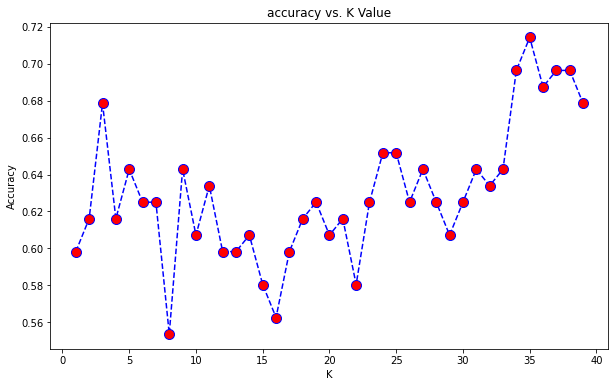

In [166]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_val)
    acc.append(metrics.accuracy_score(y_val, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

Now you see the improved results. We got the accuracy of 0.7142857142857143 at K=35. As we already derived the error plot and got the minimum error at k=35, so we will get better efficiency at that K value.

### Let's take the test data and begin testing of our trained model

In [91]:
df_test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_test.csv')
df_test
X_test = df_test.iloc[:, df_test.columns!='id']
X_test = pd.get_dummies(X, prefix ='color', prefix_sep='_',drop_first=True,)
X_test

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white
0,0.471774,0.387937,0.706087,0.698537,0,0,0,0,0
1,0.427332,0.645024,0.565558,0.451462,0,0,0,0,1
2,0.549602,0.491931,0.660387,0.449809,0,0,0,0,0
3,0.638095,0.682867,0.471409,0.356924,0,0,0,0,1
4,0.361762,0.583997,0.377256,0.276364,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
524,0.377573,0.390158,0.696465,0.355373,0,1,0,0,0
525,0.229161,0.601265,0.191282,0.475115,0,0,1,0,0
526,0.510497,0.498347,0.708020,0.714154,0,0,0,0,1
527,0.331472,0.765835,0.338207,0.193431,0,0,1,0,0


### Let's check the prediction and model score

Being an instance based learing algorithm actuall training and prediction simultanously happens in KNN at the time or prediction.

In [111]:
y_test = neigh.predict(X_test)
y_test_b = neigh.predict_proba(X_test )



In [113]:
y_test.shape

(529,)

In [114]:
y_test_b

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ]])

### Checking nearest neighbours close to one random test datapoint 

In [136]:
datapoint = X.iloc[15, :]
datapoint = datapoint.values.reshape(1,-1)

In [138]:
print(y[15])
print(y[112])
print(y[240])

1
1
1


In [137]:
neigh.kneighbors(datapoint, n_neighbors=3, return_distance=True)


(array([[0.        , 0.05955004, 0.07502987]]), array([[ 15, 240, 112]]))

In [ ]:
neighkneighbors_graph([X, n_neighbors, mode])